##  Метод дихотомии(бисекции)

Метод **бисекции** или метод **дихотомии** — простейший численный метод для решения нелинейных уравнений вида **f(x)=0**. Предполагается только непрерывность функции f(x). Поиск основывается на теореме о промежуточных значениях(теорема Больцано-Коши).

<img
 src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Bisection_method.svg"
 caption="Несколько шагов метода"
 width="250">

Критерии остановки:
1. $|x_{n} - x_{n-1}|$ < $\varepsilon$
2. $|f(x)|$ < $\varepsilon$

---

Теоретическое колличество итераций $\textbf{N=$log_2(\frac{|b - a|}{\varepsilon})$}$

Линейная сходимость:
* Скорость сходимости метода $\mu$ = 0.5
* Порядок сходимости q = 1

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation

### Начальные данные

In [84]:
a = 0.0
b = 10.0

def func(x):
    return 4*np.sin(x/2) + np.cos(x) * np.tanh(x) - x + 2

### Нахождение корней

In [85]:
def change_points(sep_point, a, b):
    if (func(a) * func(sep_point) <= 0):
        b = sep_point
        return a, b
    elif(func(sep_point) * func(b) <= 0):
        a = sep_point
        return a, b

In [86]:
eps_array = [1.0e-3, 1.0e-6, 1.0e-9]
n_array = [0]*3

dich_points_array = []
vis_points = []
first_k = []
second_k = []

for i in range(len(eps_array)):
    current_eps = b - a
    a_, b_ = a, b
    while(current_eps >= eps_array[i]):
        n_array[i] += 1
        sep_point = (a_ + b_) / 2.0
        current_eps /= 2.0
        a_, b_ = change_points(sep_point, a_, b_)
        if(i == 0):
            vis_points.append(sep_point)
    if(current_eps < eps_array[i]):
        first_k.append("True")
    else:
        first_k.append("False")
    if(abs(func(sep_point)) < eps_array[i]):
        second_k.append("True")
    else:
        second_k.append("False")
    dich_points_array.append(sep_point)

In [87]:
epsilon = pd.Series(eps_array)
dich_points = pd.Series(dich_points_array, index = epsilon)
n_result = pd.Series(n_array, index = epsilon)
n_theory = pd.Series(np.round(np.log2(np.ones(3) * abs(b - a)/eps_array)),\
                     index = epsilon, dtype = 'int')
first_k = pd.Series(first_k, index = epsilon)
second_k = pd.Series(second_k, index = epsilon)

Summary = pd.DataFrame(data = {'x':dich_points, 'N_result':n_result,\
                               'N_theory':n_theory, 'First':first_k,\
                               'Second':second_k},\
                      index = epsilon)

## Визуализация и результаты

In [88]:
print(Summary)

                     x  N_result  N_theory First Second
1.000000e-03  4.793091        14        13  True   True
1.000000e-06  4.792778        24        23  True   True
1.000000e-09  4.792778        34        33  True   True


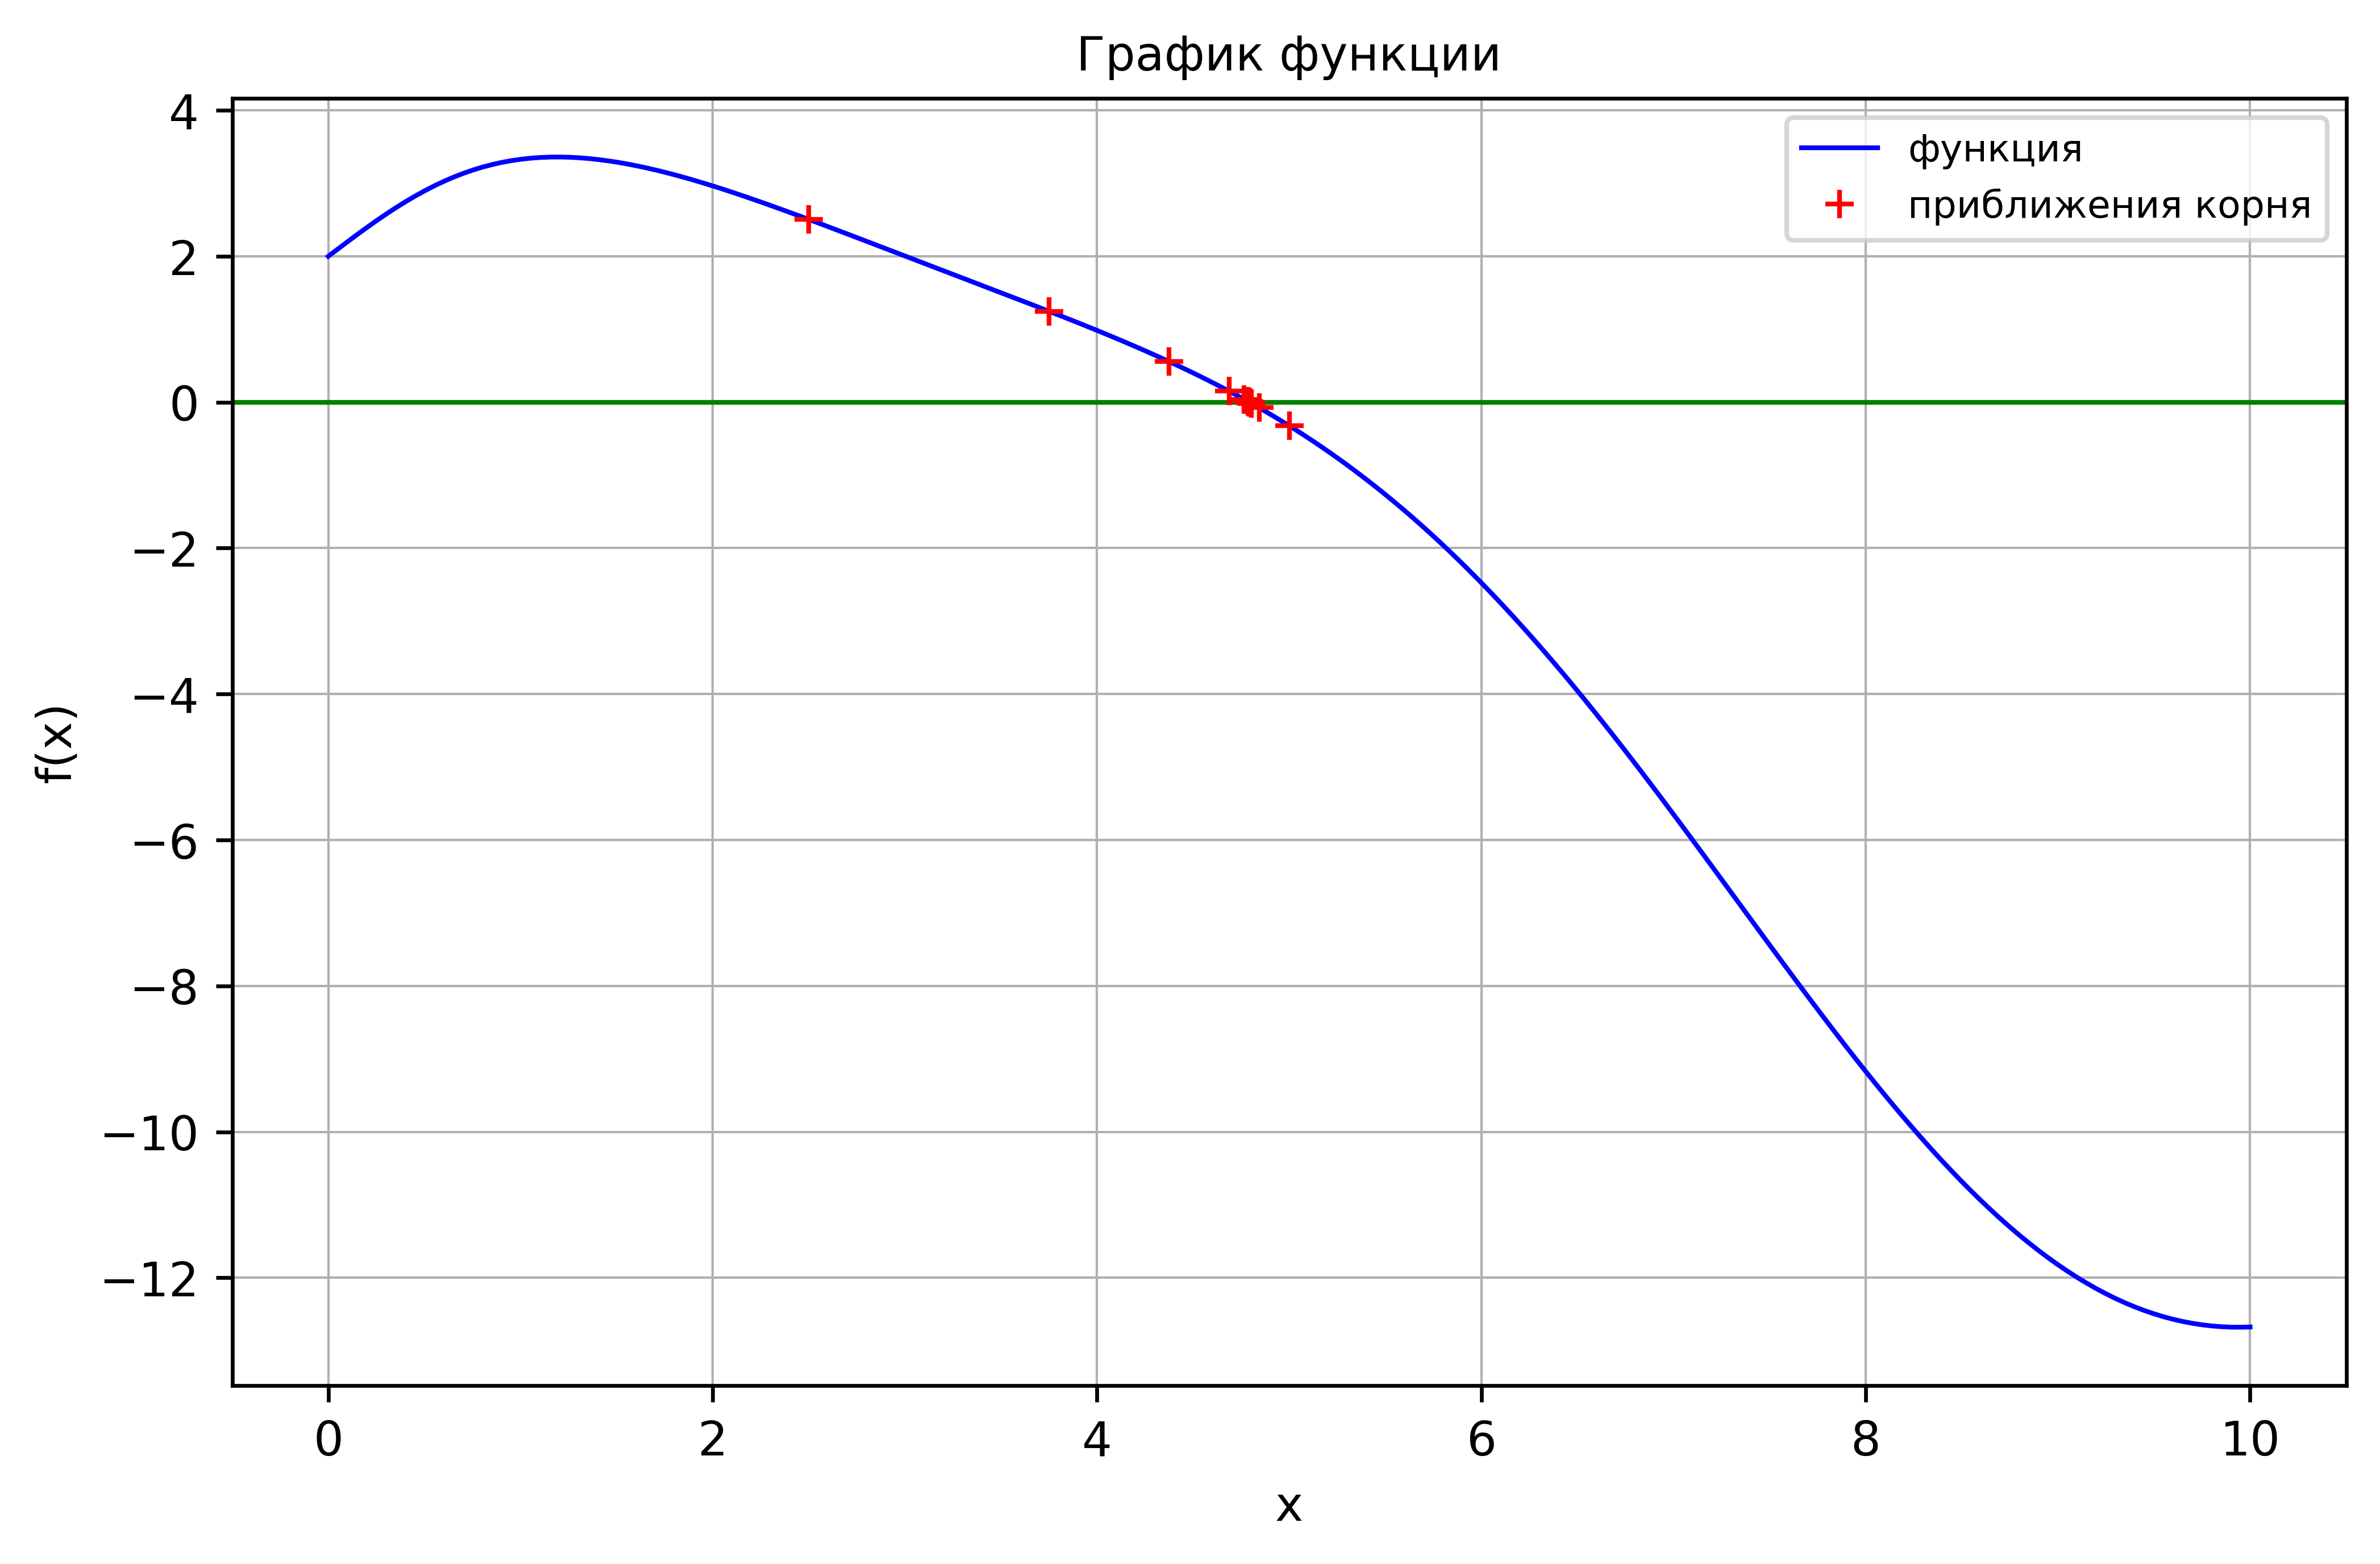

In [89]:
plt.figure(figsize = (8, 5),dpi = 600)

N_vis = 200
x_vis = np.linspace(a, b, num = N_vis)
vis_points = np.array(vis_points)

plt.plot(x_vis, func(x_vis),c = 'b', label = "функция", lw = 1.)
plt.axhline(0, c = 'g', lw = 1.)
plt.plot(vis_points, func(vis_points), '+', c = 'r',\
         label = "приближения корня", mew = 1.)

plt.xlabel('x', fontsize=10.)
plt.ylabel('f(x)', fontsize=10.)
plt.title("График функции", fontsize=10.)
plt.grid(lw = 0.5)
plt.legend(fontsize=8.)
plt.show()

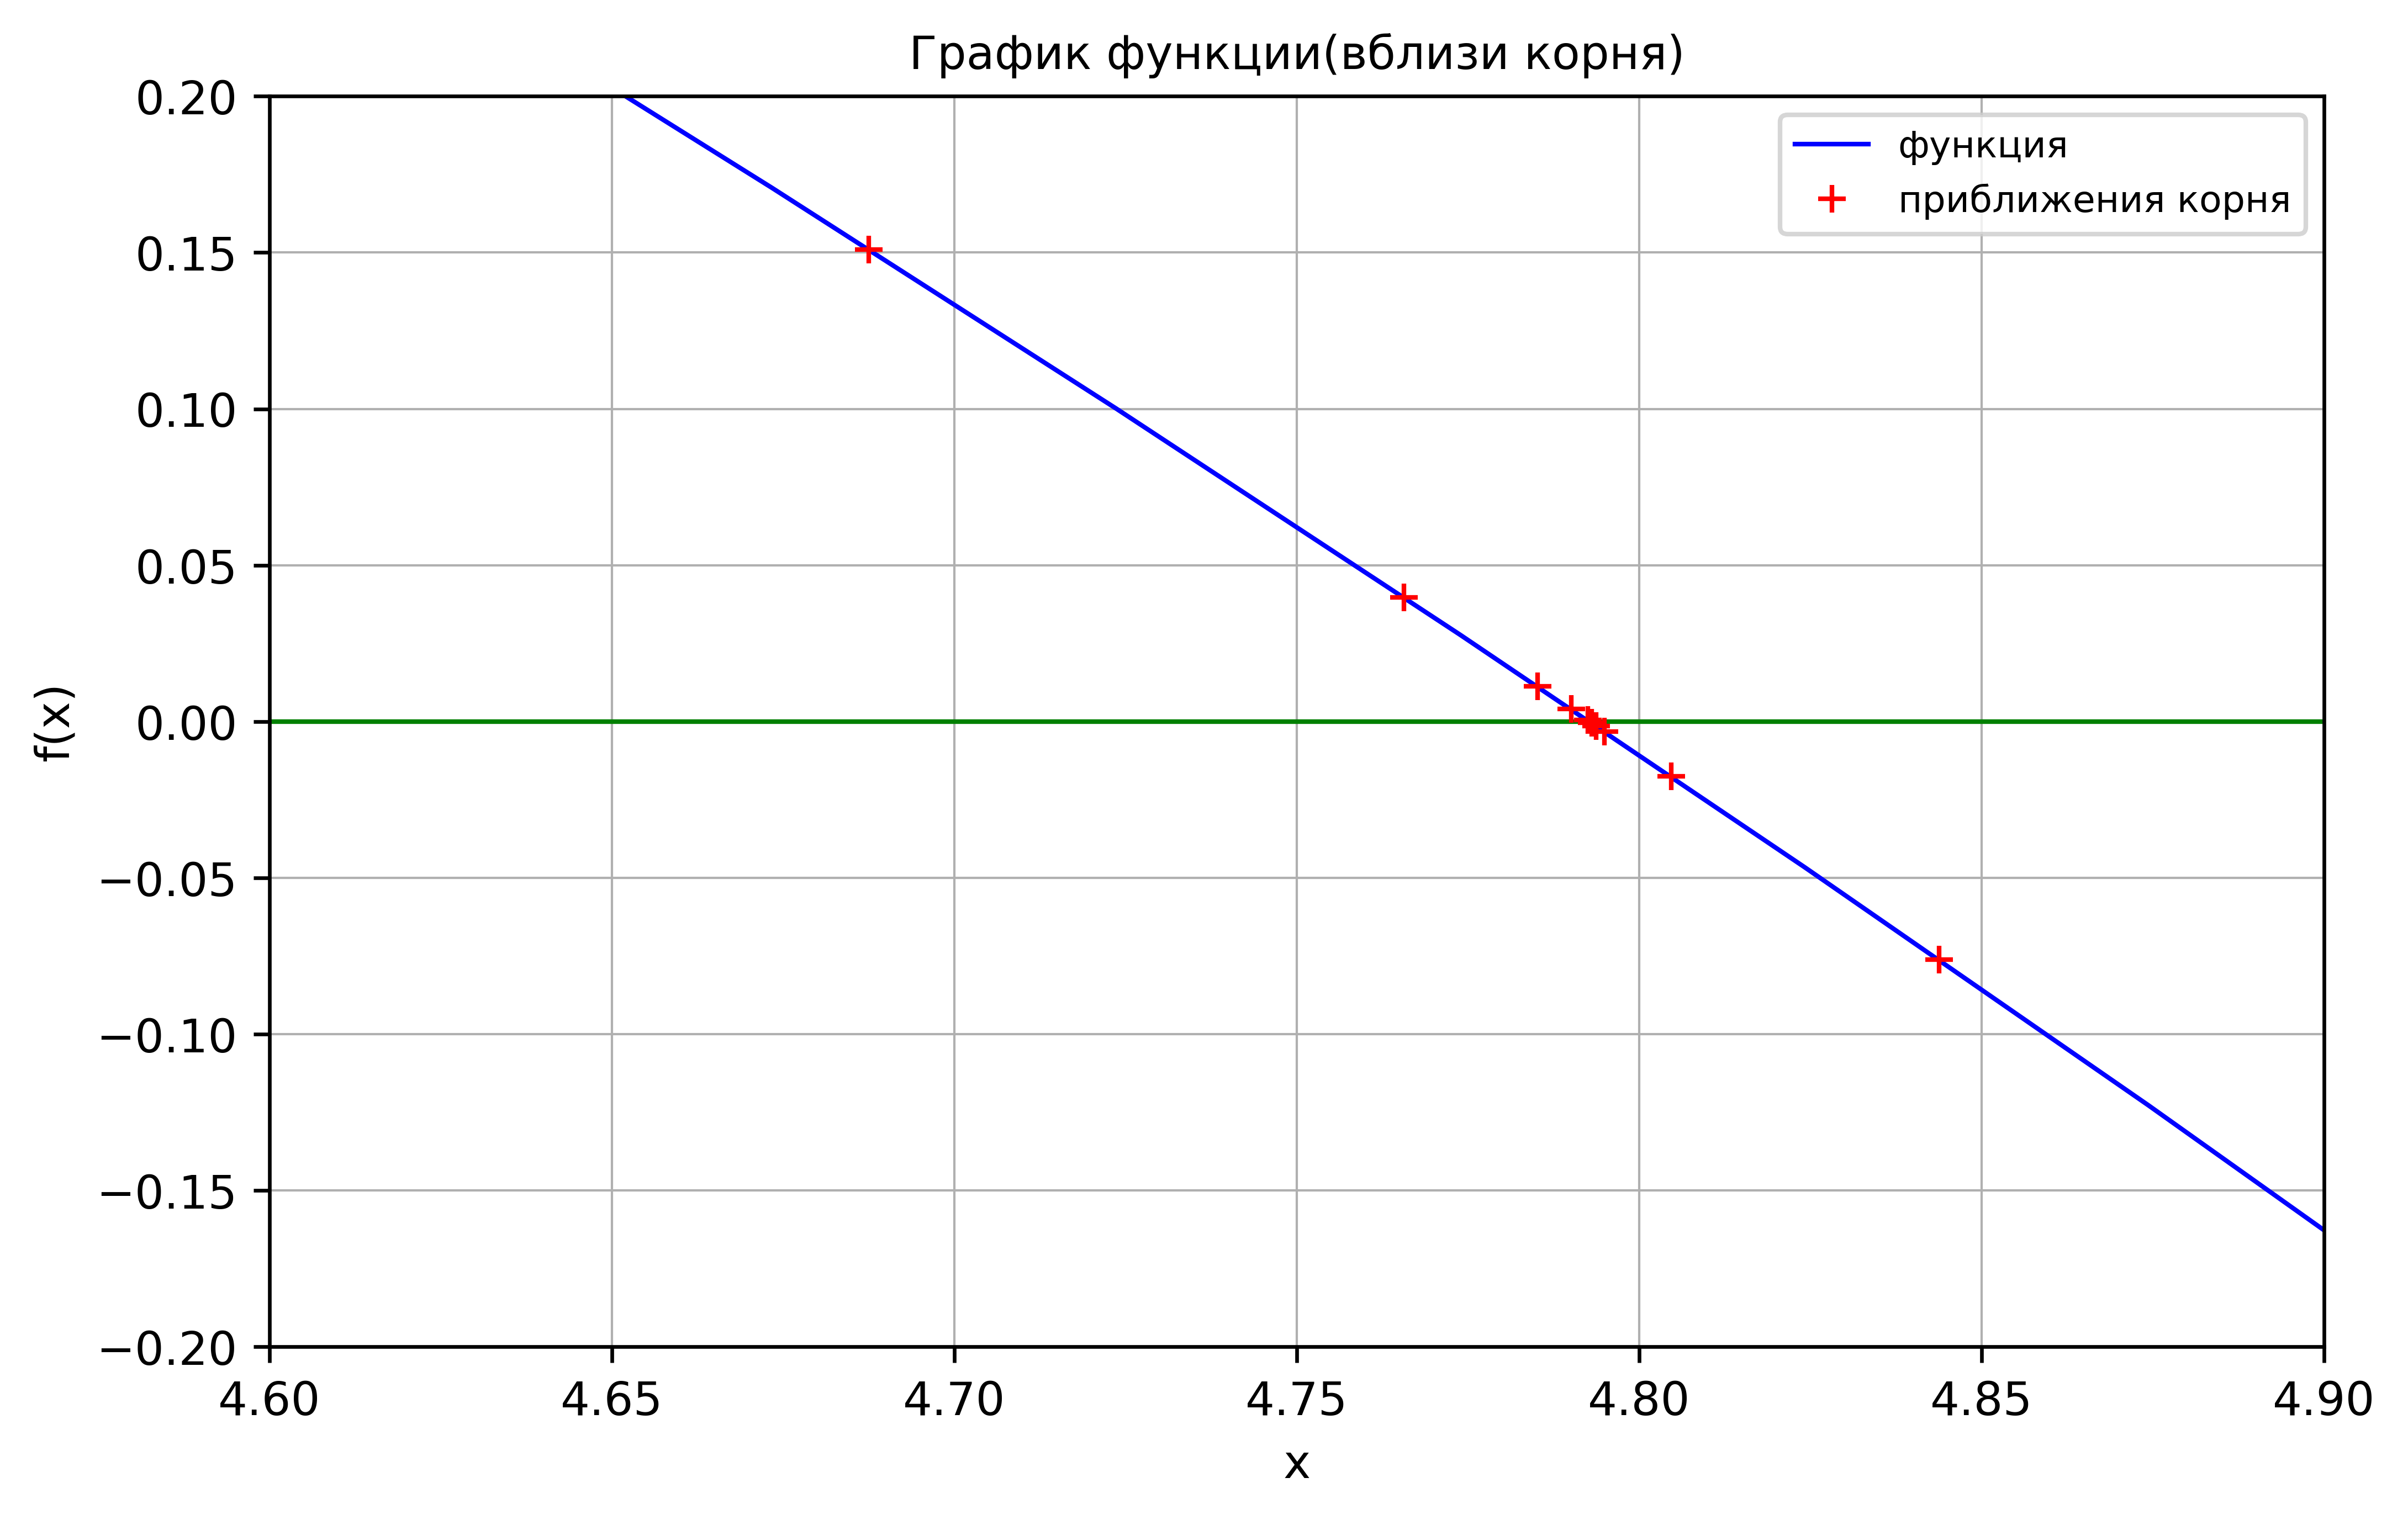

In [90]:
plt.figure(figsize = (8, 5),dpi = 600)

N_vis = 200
x_vis = np.linspace(a, b, num = N_vis)
vis_points = np.array(vis_points)

plt.plot(x_vis, func(x_vis),c = 'b', label = "функция", lw = 1.)
plt.axhline(0, c = 'g', lw = 1.)
plt.plot(vis_points, func(vis_points), '+', c = 'r',\
         label = "приближения корня", mew = 1.)

plt.xlim(4.6 ,4.9)
plt.ylim(-0.2, 0.2)

plt.xlabel('x', fontsize=10.)
plt.ylabel('f(x)', fontsize=10.)
plt.title("График функции(вблизи корня)", fontsize=10.)
plt.grid(lw = 0.5)
plt.legend(fontsize=8.)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


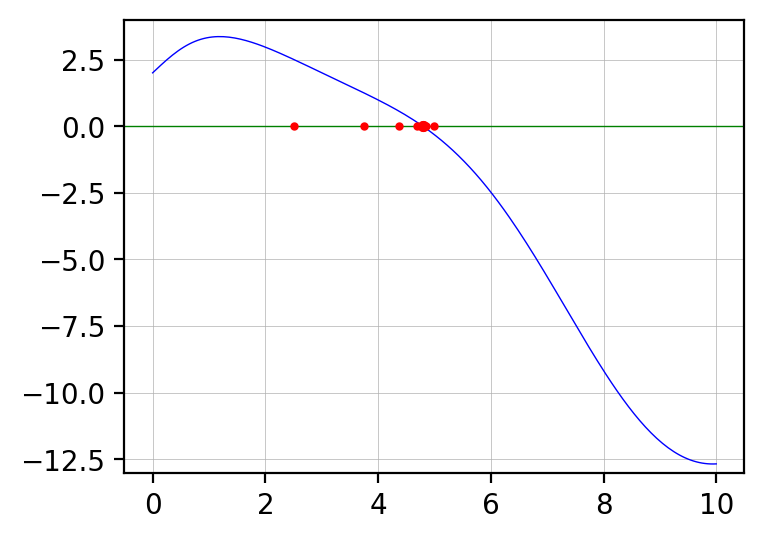

In [99]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (4, 3)

fig, ax = plt.subplots()

plt.grid(lw = 0.5)

def animate(i):
    ax.cla()
    ax.plot(x_vis, func(x_vis),c = 'b', lw = 0.5)
    ax.axhline(0, c = 'g', lw = 0.5)
    ax.plot(vis_points[0:(i+1)], np.zeros(i+1), '.', c = 'r', mew = 0.01)
    ax.plot([vis_points[i],vis_points[i]], [func(vis_points[i]),0],\
            c = 'r', marker = '.', lw = 0.5)
    ax.grid(lw = 0.25)
    ax.set_xlim(-0.5 ,10.5)
    ax.set_ylim(-13, 4)
    ax.set_xlabel('', fontsize=2.)
    ax.set_ylabel('', fontsize=2.)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(vis_points))

anim.save('dichotomy.gif', fps = 2)